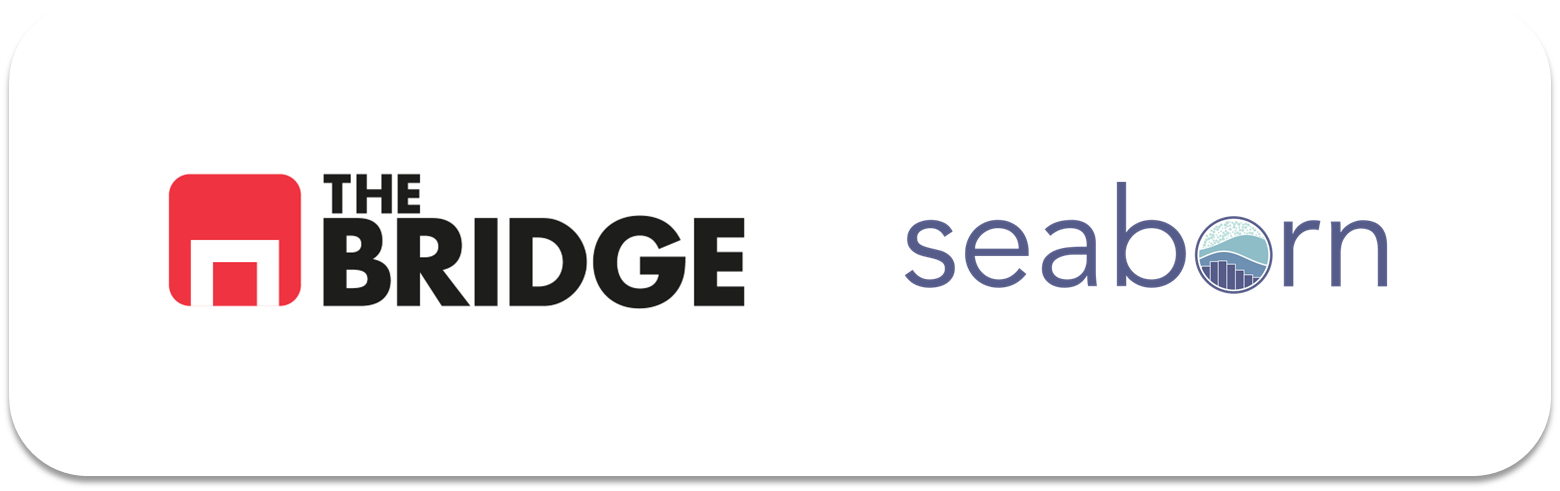

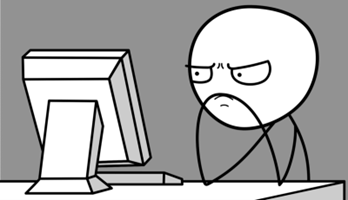

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [5]:
def compara_categoricas(df, col1, col2):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5)) # Creamos la fila inicial
    sns.countplot(x=col1, data=df, ax=axs[0], hue = col1)
    axs[0].set_title(f'Frecuencias Absolutas de {col1}')
    sns.countplot(x=col2, data=df, ax=axs[1], hue = col2)
    axs[1].set_title(f'Frecuencias Absolutas de {col2}')

    # Añadimos la comparativa como una figura adicional (catplot no se puede generar a nivel de AXES, es una Figure ya de por sí.)
    catplot = sns.catplot(x=col1, col=col2, kind="count", data=df, hue = col1)
    catplot.fig.suptitle(f'Catplot de {col1} por {col2}', y = 1.1) # Aumentamos ligeramente la coordenada y (ver docstring de suptitle) para que no se superpongan los letreros       
   
    contingency_table = pd.crosstab(df[col1], df[col2])
    return contingency_table





### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


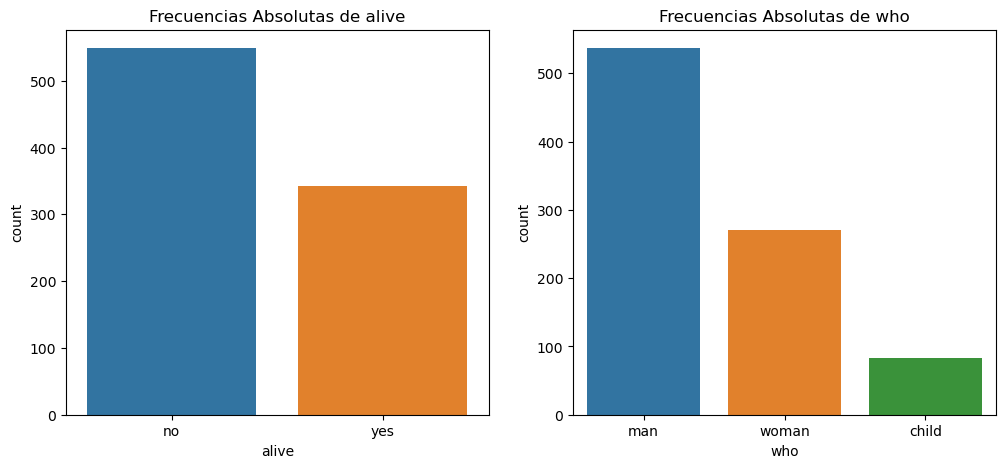

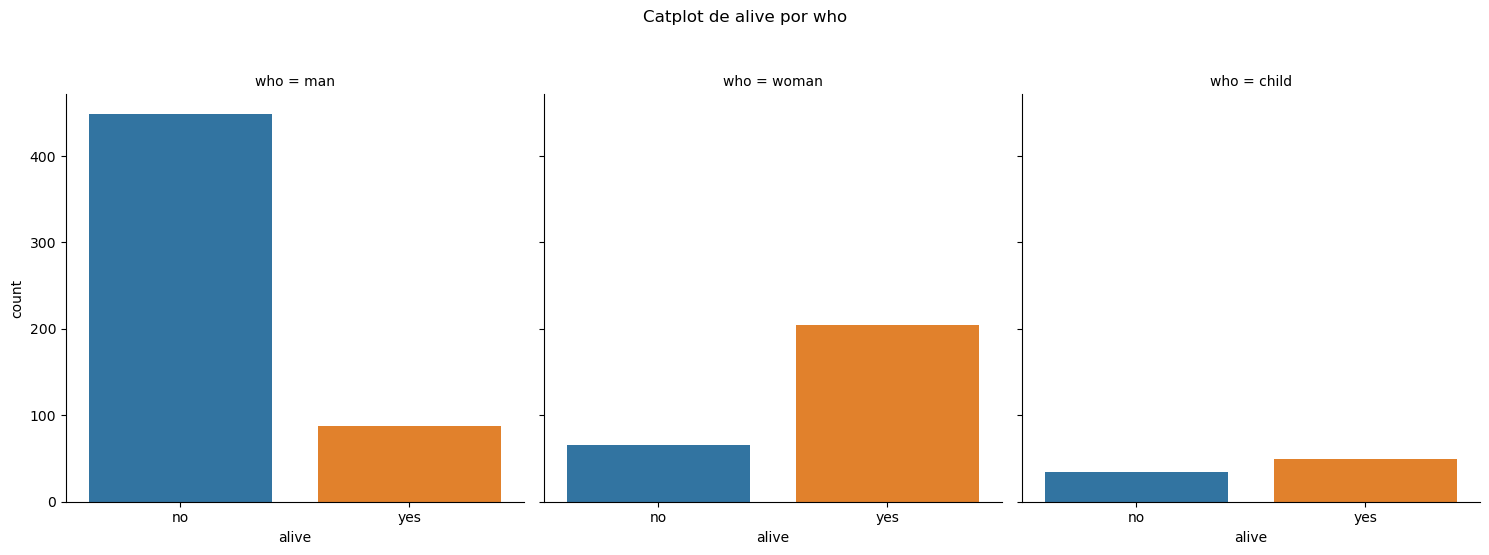

In [6]:
compara_categoricas(df_titanic, "alive", "who")

#### Alive y Class

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


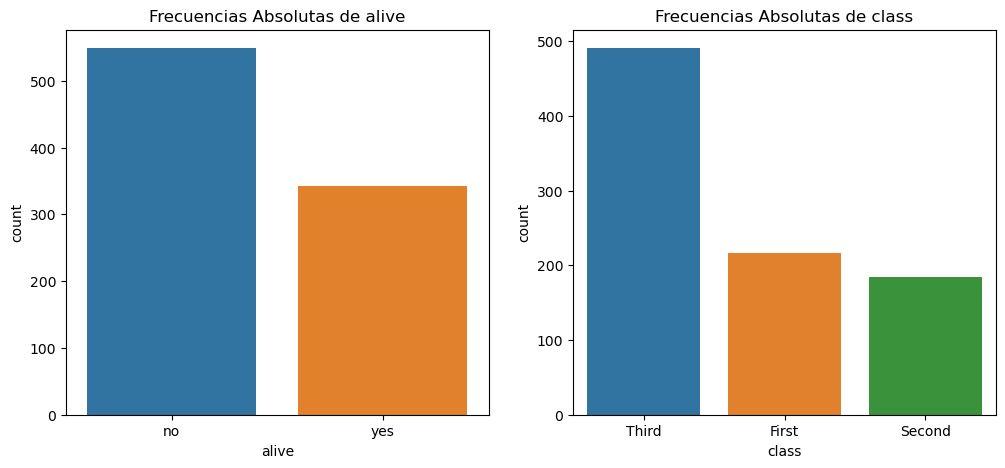

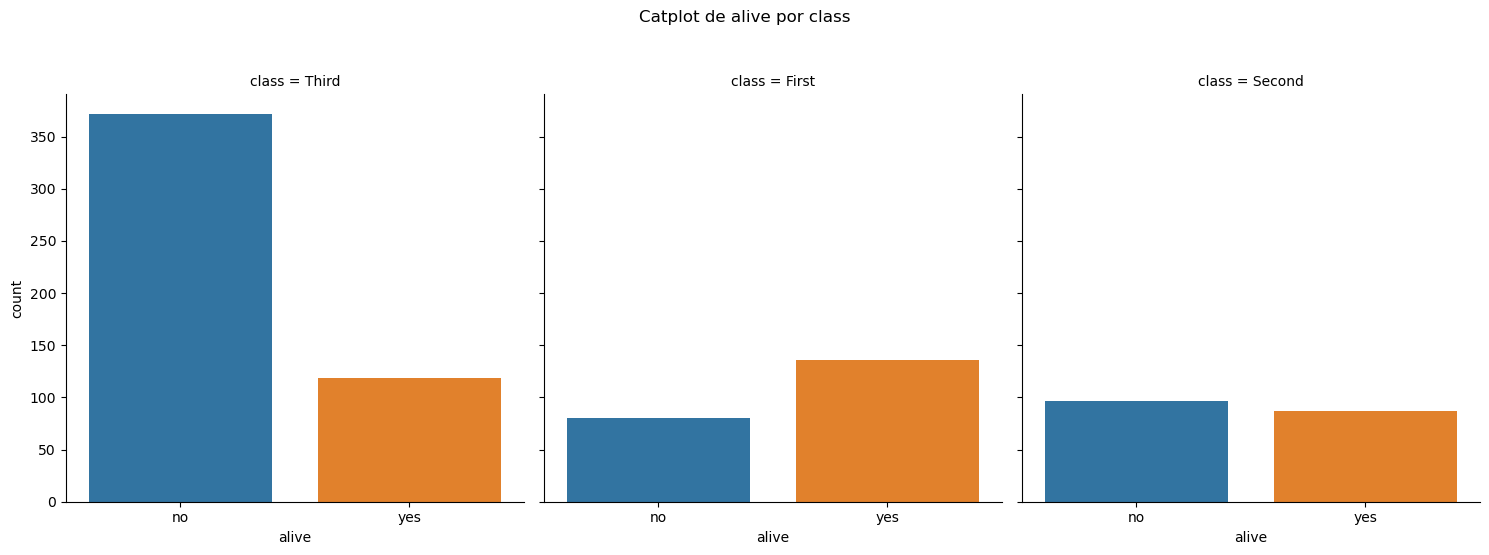

In [7]:
compara_categoricas(df_titanic,"alive","class")

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [8]:
def compara_cat_num(df, categorical_col, numerical_col):
    unique_categories = df[categorical_col].unique()
    n_rows = len(unique_categories) // 3 + (len(unique_categories) % 3 > 0) # Una forma un poco diferente porque ahora son 3 y no dos el número máximo de columnas

    fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
    axs = axs.flatten() # Seguimos aplanando para poder acceder por indice a las figuras y no por coordenadas en un array bidimensional

    for i, valor in enumerate(unique_categories):
        subset_df = df[df[categorical_col] == valor] # Nos quedamos con el subdataframe sólo para los valores de la categórica que sean == valor (una de las variables del for)
        sns.histplot(subset_df[numerical_col], ax=axs[i], kde=True)
        axs[i].set_title(f'Histograma de {numerical_col} para el valor {valor}')

    for j in range(i + 1, len(axs)): # quitamos los ejes de la subfigura que no tiene gráfica asignada, si la hay
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()


### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

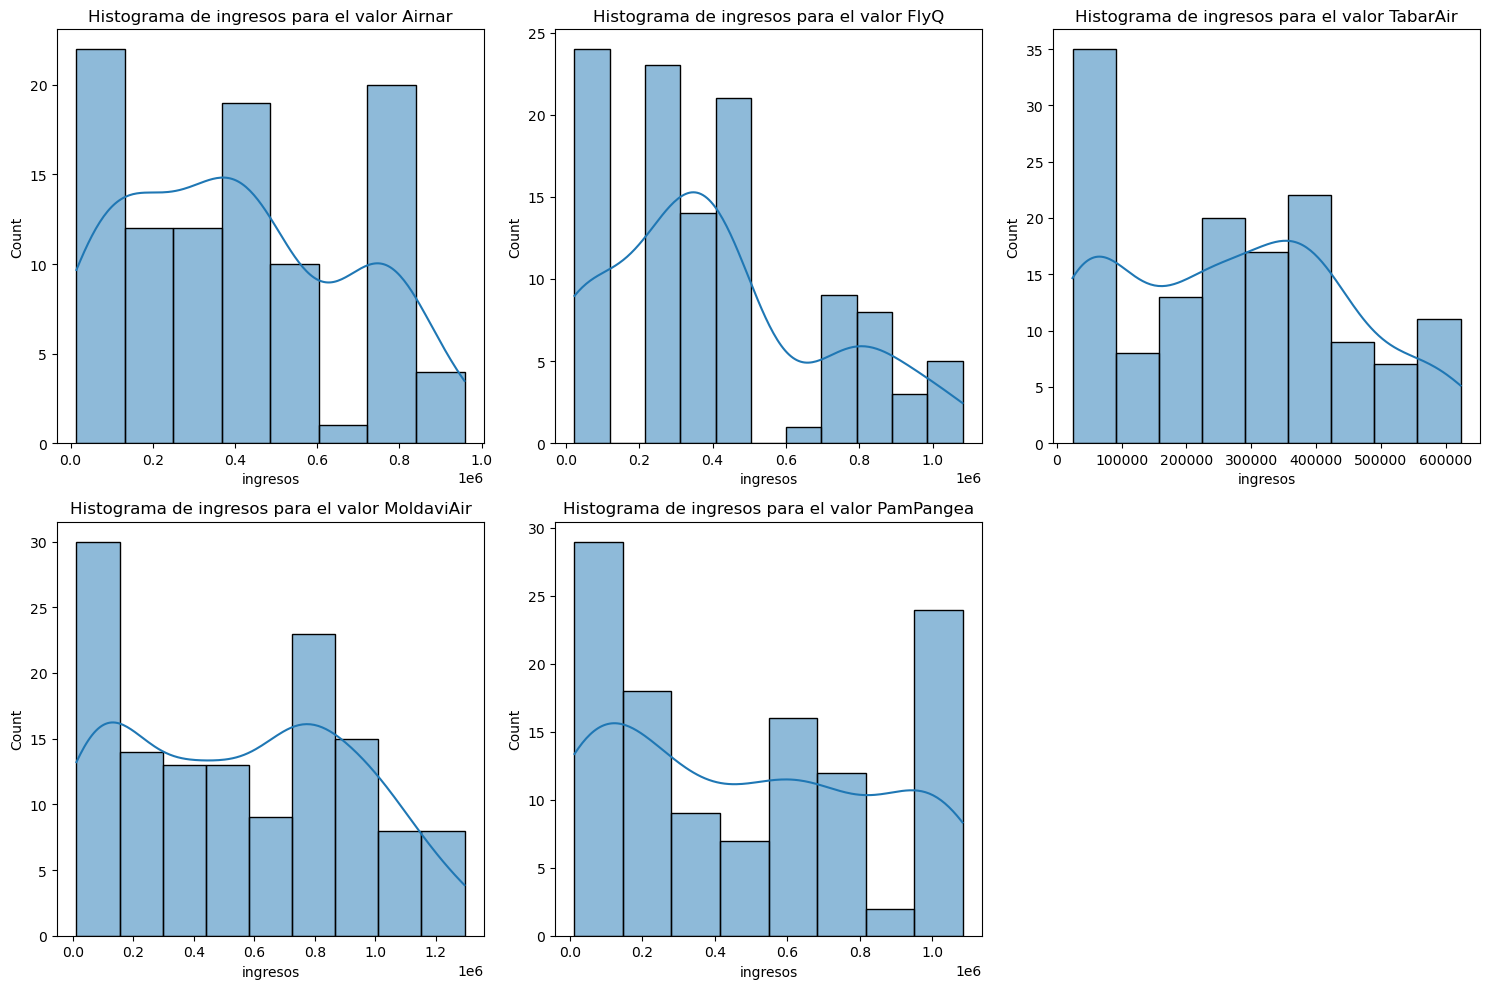

In [9]:
compara_cat_num(df_viajes,"aircompany","ingresos")

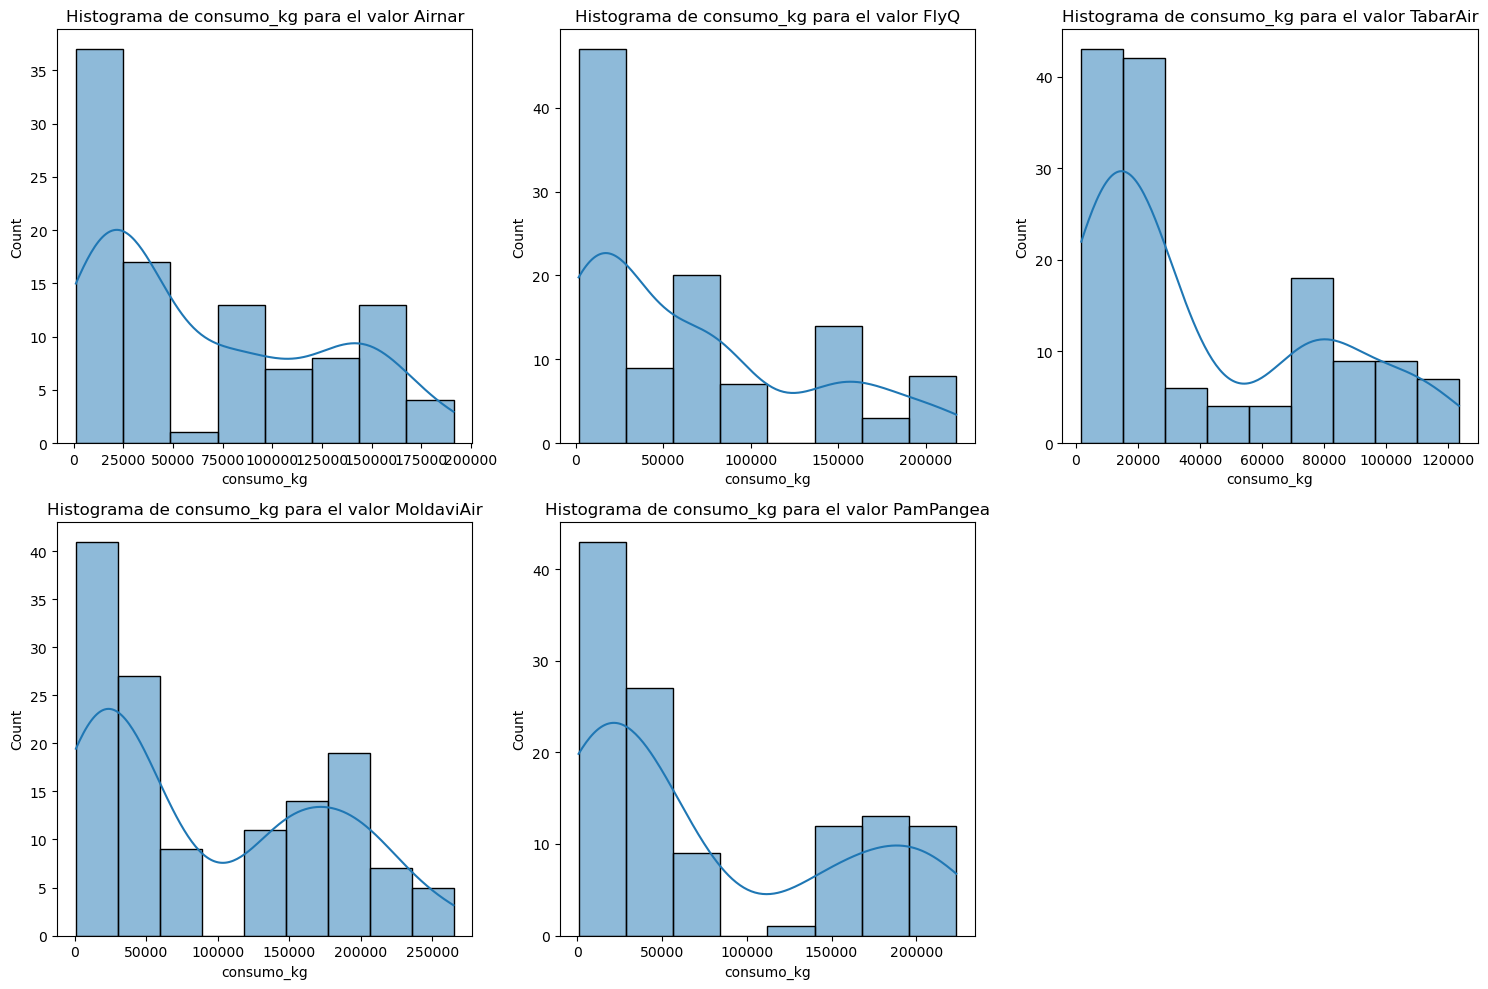

In [10]:
compara_cat_num(df_viajes,"aircompany","consumo_kg")

*Como argumentos adicionales: Poder quitar el KDE, controlar el número de bins, un parámetro para que los ejes de valores sean todos iguales y quizás un parámetro que permita ver los histogramas en una única gráfica*

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [11]:
def compara_multi(df, num_col1, num_col2, cat_col=None, size=5):
    plt.figure(figsize=(8, 6))
    if cat_col:
        sns.scatterplot(data=df, x=num_col1, y=num_col2, hue=cat_col, s= size) 
    else:
        sns.scatterplot(data=df, x=num_col1, y=num_col2, s= size)
    plt.title(f'Diagrama de Dispersión de {num_col1} vs {num_col2} {(f"y con {cat_col} en color") if cat_col else ""}')
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)
    plt.show()


### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

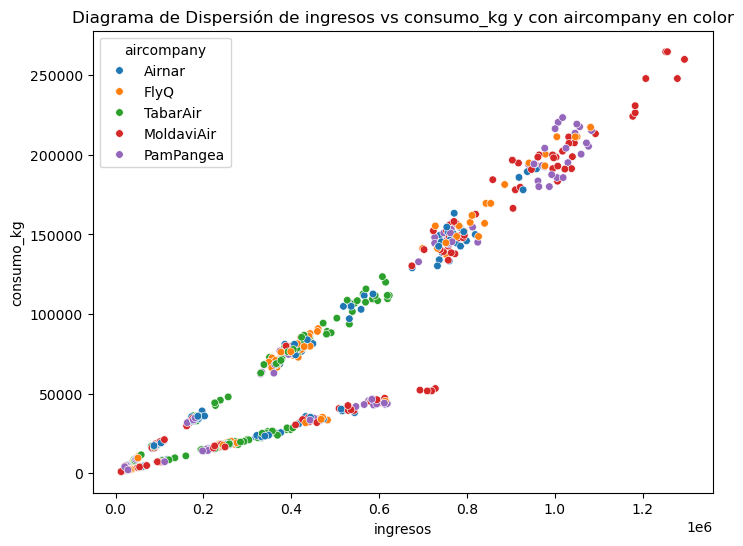

In [15]:
compara_multi(df_viajes, "ingresos","consumo_kg", cat_col="aircompany", size = 30)

*Simplificaría los ejes, valores máximo y mínimo sólo, quitaría los marcos de las cajas, incluyendo los de la leyenda y el título de la figura, los ejes los dividiría en 1000 o 10000 para que los números sean más pequeños, remarcaría las zonas que refuercen el mensaje. Por ejemplo: Si el mensaje es que hay dos líneas, entonces quitária los colores, si el mensaje es que Tabarair es la única que no tiene altos consumos intentaría que sólo hubiera dos colores Tabarair y el resto, y asi*

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

*Si uso duracion como color*

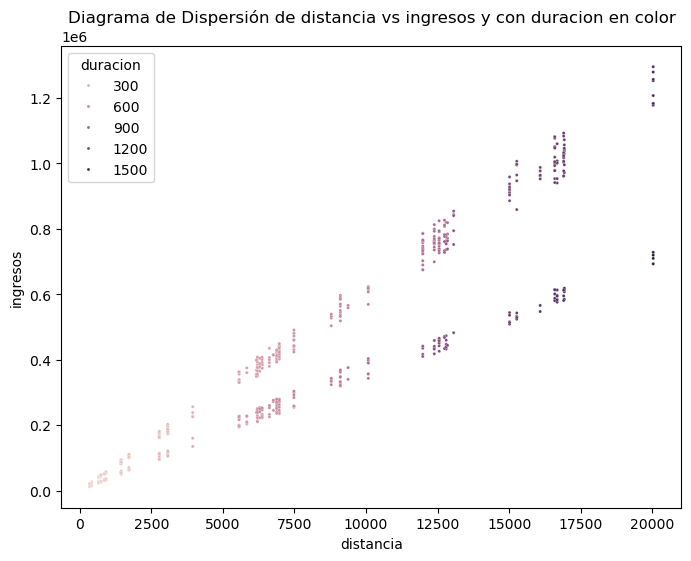

In [16]:
compara_multi(df_viajes,"distancia","ingresos",cat_col="duracion")

*La visualización se hace complicada, además manejar la barra de colores con seaborn no es tan inmediato como con matplotlib, así que me paso a usar duración como controlador del tamaño del punto*

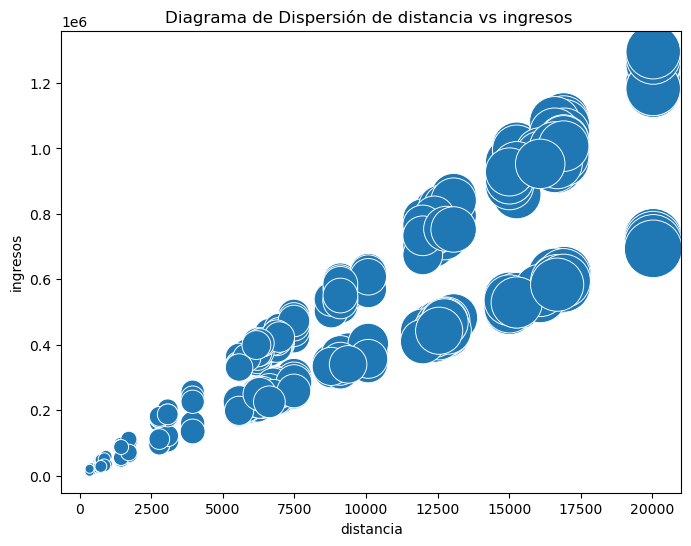

In [17]:
compara_multi(df_viajes, "distancia","ingresos", size = df_viajes["duracion"]) # Pero ahora hay que pasar todos los valores, ya que por dentro no hacemo ningun tratamiento como columna 

*Tendremos que tocar el tamaño con algun ajuste de escala*

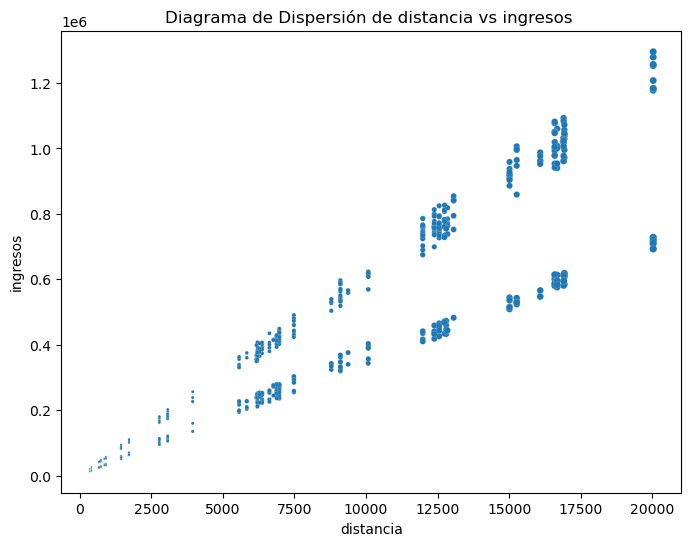

In [18]:
compara_multi(df_viajes, "distancia","ingresos", size = df_viajes["duracion"]/60) # Al dividir por 60 el tamaño es proporcional a las horas de vuelo